# **SEPARATION OF TRACKS OF INSTRUMENTS MUSICAL DIFFERENT**

**Author:** Paolo Patrone (https://github.com/patpa99)

**Goals:**


1.   Analysis of the tracks of the didgeridoo and the triangle separately
2.   Overlapping the tracks of the two instruments to form a single track
3.   Analysis of the single track
4.   Separation of the single track in order to obtain the tracks of the two different instruments analyzed previously


---

### **References of .wav files**
*   **didgeridoo.wav**: file downloaded from [SampleSwap](https://sampleswap.org/filebrowser-new.php?q=didgeridoo.wav) site
*   **triangle.wav**: track downloaded from [SampleSwap](https://sampleswap.org/filebrowser-new.php?q=triangle10.wav) site and then modified with a Python program, created by me, in order to obtain the sound in a 4 second loop


---


### **External references**
Material on Aulaweb and some information on sites such as Wikipedia

## **Introduction**
In **sound**, which propagates in a fluid medium (typically in **air**), the **vibratory movements**, coming from a certain object (called **sound source**), cause **oscillations** which are **displacements of the particles** around the resting position and along the direction of propagation wave. These vibratory movements originate **sound waves**.
>>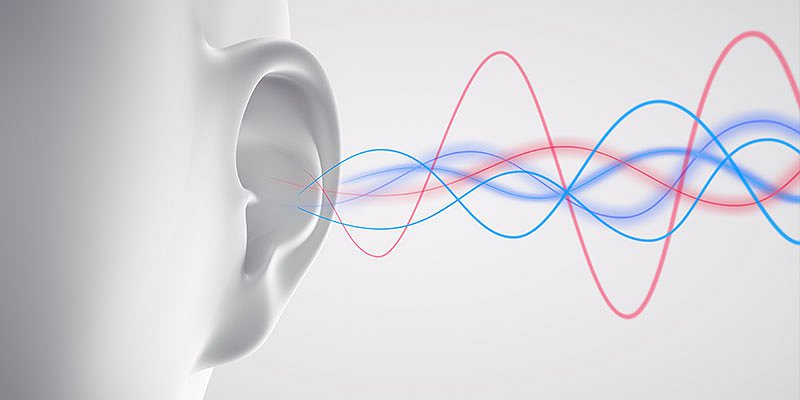

Sound can be analyzed:


*   in the **time** domain (hearable by humans)
*   in the **frequency** domain



---



### **Signal sampling**
The **signal sampling** is a technique that consists in converting a continuous signal over time into a discrete signal. In order to obtain, subsequently, **a digital sound starting from the original analog sound**.

>> 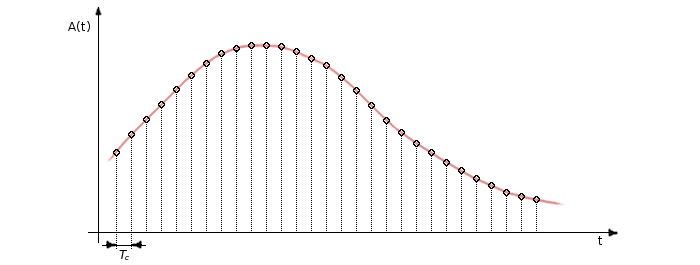


Later I will indicate with:


*   $T_s$: **sampling time or distance**, which is the time interval between one sample and the next (measured in **seconds** or its multiples or submultiples)
*   $f_s$: **sampling rate**, which is the number of samples present in a second of digital signal (measured in **Hertz**)

The relation that connects them is the following:

$T_s = \frac{1}{f_s}$ and $f_s = \frac{1}{T_s}$

### **Nyquist-Shannon sampling theorem**

Speaking of sampling, the **Nyquist-Shannon sampling theorem** deserves particular attention. It specifies the conditions in order to recover the continuous signal (analog signal) starting from the discrete signal (digital signal).

A function $g(t)$ cannot be both limited in band and in time at the same time (even if there are functions that are not limited in either band or time). The sampling theorem is valid only for band-bound or time-bound functions and will be divided into two theorems, each valid for its own case.

#### **Sampling theorem for limited-band functions**

If a $g(t)$ function is band-limited with $Ω$ band, it can be represented as

>>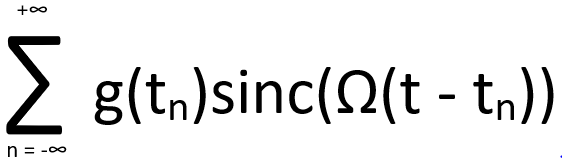

where $sinc(t) = \frac{sin(πt)}{πt}$ and $t_n = n*\frac{π}{Ω}$ and $n = 0$, $+-1$, $+-2 ...$

The optimal distance between equidistant samples is $\frac{π}{Ω}$ (**optimal sampling**).

The $t_n$ points are the **sampling points**.

If the sampling distance of the signal is shorter than the optimal sampling distance, the signal is called **over-sampling**, whereas if the sampling distance is greater than the optimal sampling distance, the signal is said to be undersampled (**under-sampling**). **It is possible to exactly reconstruct an oversampled signal, but not an undersampled signal**.

**Sampling theorem**: let $g$ be a bounded-band continuous function. In order to recover the continuous signal (analog signal) starting from the discrete signal (digital signal), a perfect reconstruction is guaranteed if $f_s$ is **at least double the maximum frequency** of the signal $f_{max}$.

$f$ is the frequency (measured in Hertz)

$ω$ is the pulsation (measured in $\frac{rad}{s}$)

The relation that connects them is $f = \frac{ω}{2π}$, so $f_{max} = \frac{Ω}{2π}$. Consequently $f_s = 2*f_{max} = \frac{Ω}{π}$. It is concluded that to exactly reconstruct a signal it is necessary that $f_s >= \frac{Ω}{π}$ (as seen above).

Dually we can also define the sampling theorem for time-limited functions (basically it is the same concept as seen above).

---

### **Continuous Fourier transform and its inverse**
Let us consider a generic (non-periodic) function $f(t)$ with $t$ which belongs to $R$.
We define the **continuous Fourier transform** of f (t) as:

>>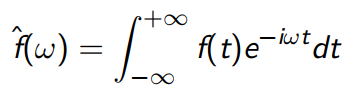

And its **inverse** as:

>>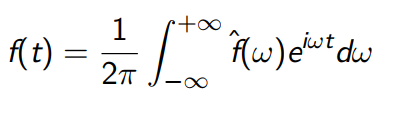


### **Existence of the Fourier transform**
We consider a function $f(t)$ with $t ∈ R$ such that

>>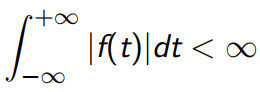

so the Fourier transform exists.


### **Discrete Fourier transform and its inverse**
The **discrete Fourier transform** is the primary tool for digital signal processing (also used in this project).

We consider a discrete signal represented as a sequence (or array) of $N$ equidistant values, defined in the interval $[0, T]$.
We define the discrete Fourier transform as (an $N-dimensional$ array):

>>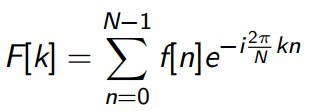

And the inverse as:

>>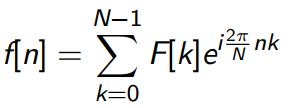

**Note**: the $f[n]$ obtained from the previous formula is not an approximation of the starting signal, but the actual signal.


---



### **Filters in the frequency domain**
They are used to **select only some useful or interesting frequencies**, eliminating the others. They are applicable to both 1D signals (e.g. audio signals) and 2D signals (e.g. images) and other multi-dimensional signals. During this project I will focus on frequency filters applied to audio signals.

To filter a signal in the frequency domain it is necessary:


1.   Calculate the **Fourier transform** of the signal ($F(x)$)
2.   Multiply the Fourier transform found ($F(x)$) by a **filter function** ($H(x)$)
3.   Calculate the **inverse of the Fourier transform** of the one obtained from the previous point, in order to return to the time domain

>>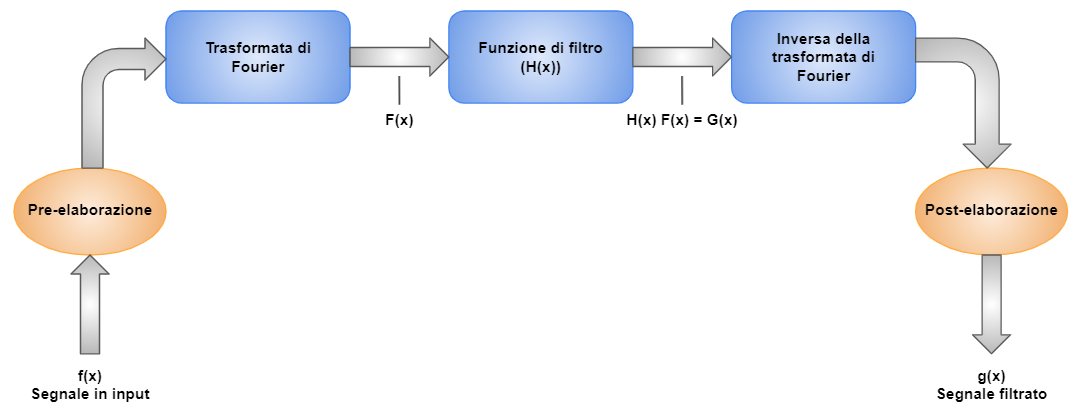


The types of frequency filters are:


*   **high-pass filters**: filter that allows only the passage of high frequencies, cutting the low frequencies (below a certain cut-off frequency). The ideal high-pass filter cuts all low-frequency components that are less than or equal to the specified distance $D_0$ from the origin of the Fourier transform. The ideal high-pass filter is structured as follows: $H(x) = 0$ if $D(x) <= D_0$, otherwise $H(x) = 1$ if $D(x) > D_0$
*   **low-pass filters**: filter that allows only the passage of low frequencies, cutting the high frequencies (above a certain cut-off frequency). The ideal low-pass filter cuts all high-frequency components that are more than the specified distance $D_0$ from the origin of the Fourier transform. The ideal low-pass filter is structured as follows: $H(x) = 1$ if $D(x) <= D_0$, otherwise $H(x) = 0$ if $D(x) > D_0$
*   **band-pass filters**: filter that allows only the passage of frequencies within a given range, cutting the frequencies not present in this range. It can be formed by composing high-pass and low-pass filters together.

Basically, by multiplying the Fourier transform of the signal by the filter function, the frequencies to be cut will be multiplied by 0 and the frequencies to be left unchanged by 1.

I will use band-pass filters in this project

Installation of **Pydub**, used to do various audio processing tasks.

In our case it will be used for overlapping the tracks of the two instruments in order to create a single musical track

In [1]:
!pip install pydub

Import needed for:


*   audio processing
*   use of .wav files
*   removal of warnings
*   use of mathematical functions
*   video display of the various graphs concerning the sounds taken into analysis

In [2]:
import IPython
import scipy.io.wavfile as wav
import warnings
warnings.filterwarnings("ignore")
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## **Didgeridoo Analysis**

**I load the didgeridoo audio into memory** using the ```IPython.display.Audio``` function

In [3]:
wavfile_didgeridoo = "didgeridoo.wav"    # enter the name or path of the .wav audio file to be loaded into memory (in this case the didgeridoo audio file)
IPython.display.Audio(wavfile_didgeridoo)

To **read the audio file** of the didgeridoo previously loaded I use the ```wav.read``` function which returns two values:


*   the **sampling rate** of the audio signal
*   the **audio signal**

In [4]:
fs_didgeridoo, sound_didgeridoo = wav.read(wavfile_didgeridoo)

I calculate **how many times the audio signal of the didgeridoo is sampled** using the ```len``` function, then I find the **sampling time** of the signal which will be the reciprocal of the sampling rate found previously ($T_s = \frac{1}{f_s}$) and I create the **time axis** using the calculated data (each sample will be at distance $T_s = \frac{1}{f_s}$)

In [5]:
N_didgeridoo = len(sound_didgeridoo)
Ts_didgeridoo = 1/fs_didgeridoo
t_didgeridoo = Ts_didgeridoo * np.arange(N_didgeridoo)

I create the **frequency axis** using the previously calculated data, then I calculate the **Fourier transform** using the ```np.fft.fft``` function and finally **I shift the peaks** obtained from the Fourier transform **in the center** using the function ```np.fft.fftshift```

In [6]:
f_didgeridoo = fs_didgeridoo/N_didgeridoo * np.arange(N_didgeridoo)
Fourier_didgeridoo = np.fft.fft(sound_didgeridoo)/N_didgeridoo   # division made to avoid that the peaks are too high
Fourier_didgeridoo_shifted = np.fft.fftshift(Fourier_didgeridoo)

**I visualize the audio signal** of the didgeridoo as the time changes

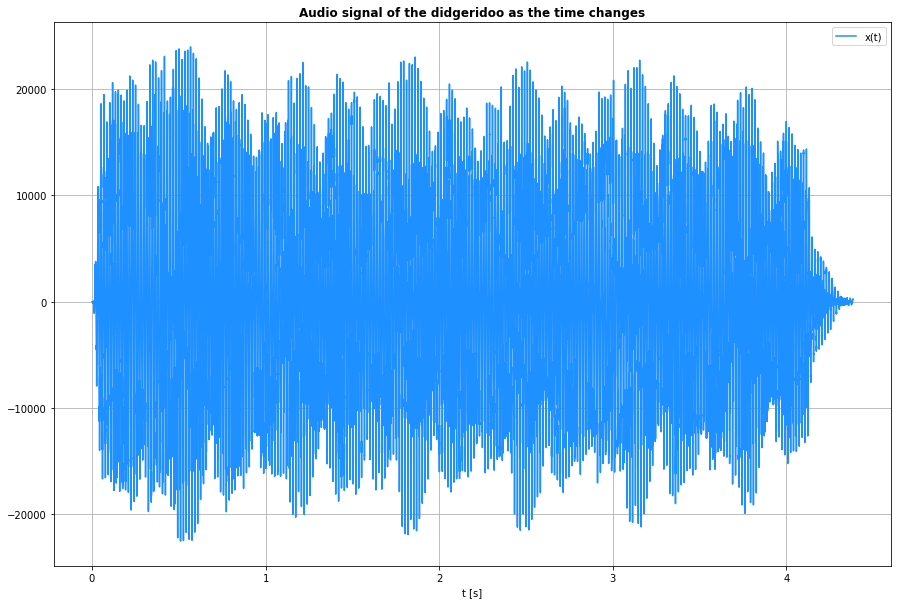

In [7]:
plt.figure(figsize=(15, 10))
plt.title("Audio signal of the didgeridoo as the time changes", fontweight="bold")
plt.plot(t_didgeridoo, sound_didgeridoo, "dodgerblue", label="x(t)")
plt.xlabel("t [s]")
plt.legend()
plt.grid()

**I visualize the Fourier transform** of the audio signal of the didgeridoo and then **the peaks** of the **shifted Fourier transform to the center** of the graph as the frequency changes.

We can see that the frequency graph of the didgeridoo turns out to be substantially zero with about
>>$2000 Hz < f < 42000 Hz$

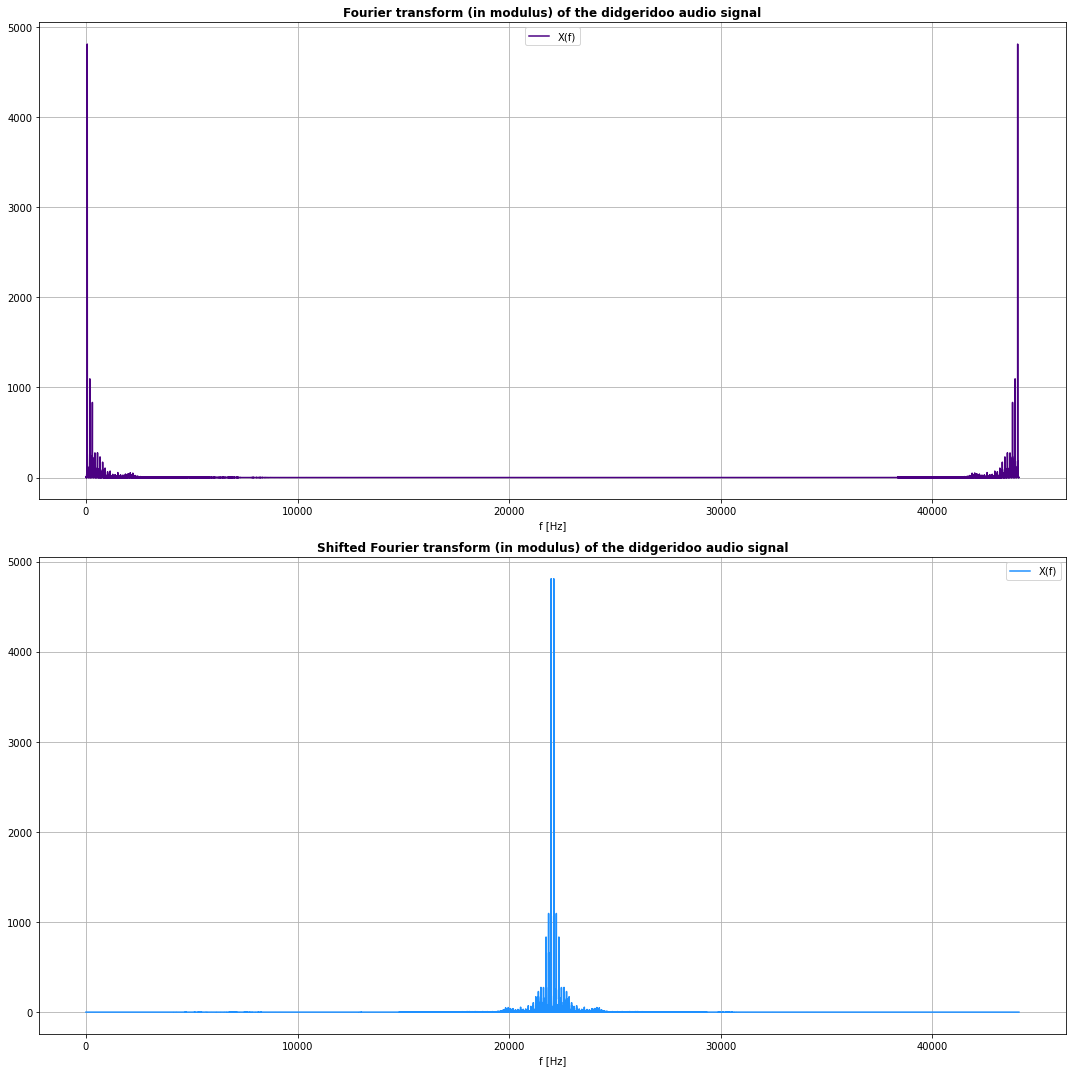

In [8]:
fig1, ax1 = plt.subplots(2, figsize=(15, 15))
ax1[0].set_title("Fourier transform (in modulus) of the didgeridoo audio signal", fontweight="bold")
ax1[0].plot(f_didgeridoo, np.abs(Fourier_didgeridoo), color="indigo", label="X(f)")
ax1[0].set_xlabel("f [Hz]")
ax1[0].legend()
ax1[0].grid()

ax1[1].set_title("Shifted Fourier transform (in modulus) of the didgeridoo audio signal", fontweight="bold")
ax1[1].plot(f_didgeridoo, np.abs(Fourier_didgeridoo_shifted), color="dodgerblue", label="X(f)")
ax1[1].set_xlabel("f [Hz]")
ax1[1].legend()
ax1[1].grid()
plt.tight_layout()

## **Triangle Analysis**

**I load the triangle audio into memory** using the ```IPython.display.Audio``` function

In [9]:
wavfile_triangle = "triangle.wav"    # enter the name or path of the .wav audio file to be loaded into memory (in this case the triangle audio file)
IPython.display.Audio(wavfile_triangle)

To **read the audio file** of the triangle previously loaded I use the ```wav.read``` function which returns two values:


*   the **sampling rate** of the audio signal
*   the **audio signal**

In [10]:
fs_triangle, sound_triangle = wav.read(wavfile_triangle)

I calculate **how many times the audio signal of the triangle is sampled** using the ```len``` function, then I find the **sampling time** of the signal which will be the reciprocal of the sampling rate found previously ($T_s = \frac{1}{f_s}$) and I create the **time axis** using the calculated data (each sample will be at distance $T_s = \frac{1}{f_s}$)

In [11]:
N_triangle = len(sound_triangle)
Ts_triangle = 1/fs_triangle
t_triangle = Ts_triangle * np.arange(N_triangle)

I create the **frequency axis** using the previously calculated data, then I calculate the **Fourier transform** using the ```np.fft.fft``` function and finally **I shift the peaks** obtained from the Fourier transform **in the center** using the function ```np.fft.fftshift```

In [12]:
f_triangle = fs_triangle/N_triangle * np.arange(N_triangle)
Fourier_triangle = np.fft.fft(sound_triangle)/N_triangle   # division made to avoid that the peaks are too high
Fourier_triangle_shifted = np.fft.fftshift(Fourier_triangle)

**I visualize the audio signal** of the triangle as the time changes

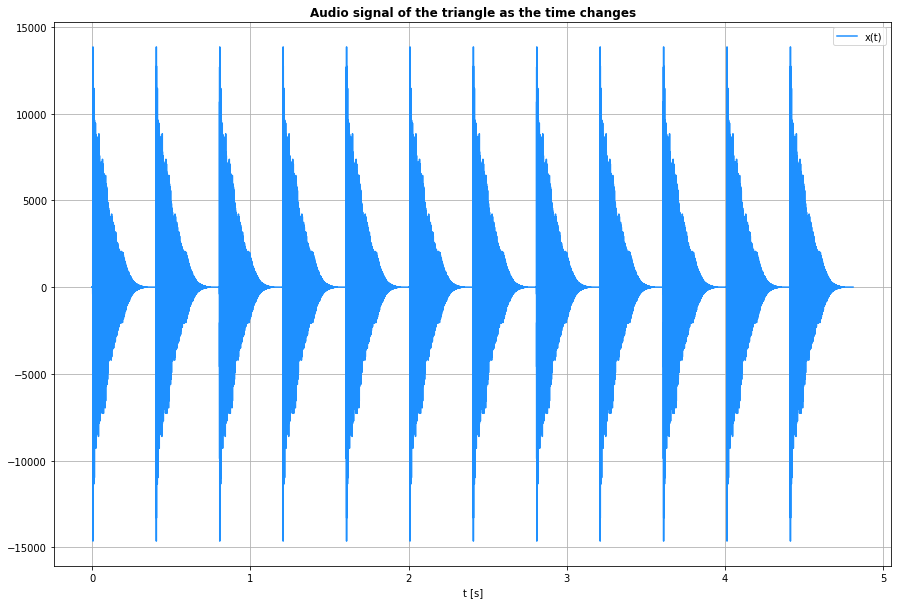

In [13]:
plt.figure(figsize=(15, 10))
plt.title("Audio signal of the triangle as the time changes", fontweight="bold")
plt.plot(t_triangle, sound_triangle, "dodgerblue", label="x(t)")
plt.xlabel('t [s]')
plt.legend()
plt.grid()

**I visualize the Fourier transform** of the audio signal of the triangle and then **the peaks** of the **shifted Fourier transform to the center** of the graph as the frequency changes.

We can see that the frequency graph of the triangle turns out to be substantially zero with about
>>$f < 4500 Hz$ (except a small peak)

or

>>$11000 Hz < f < 34000 Hz$

or

>>$f > 39500 Hz$ (except a small peak)

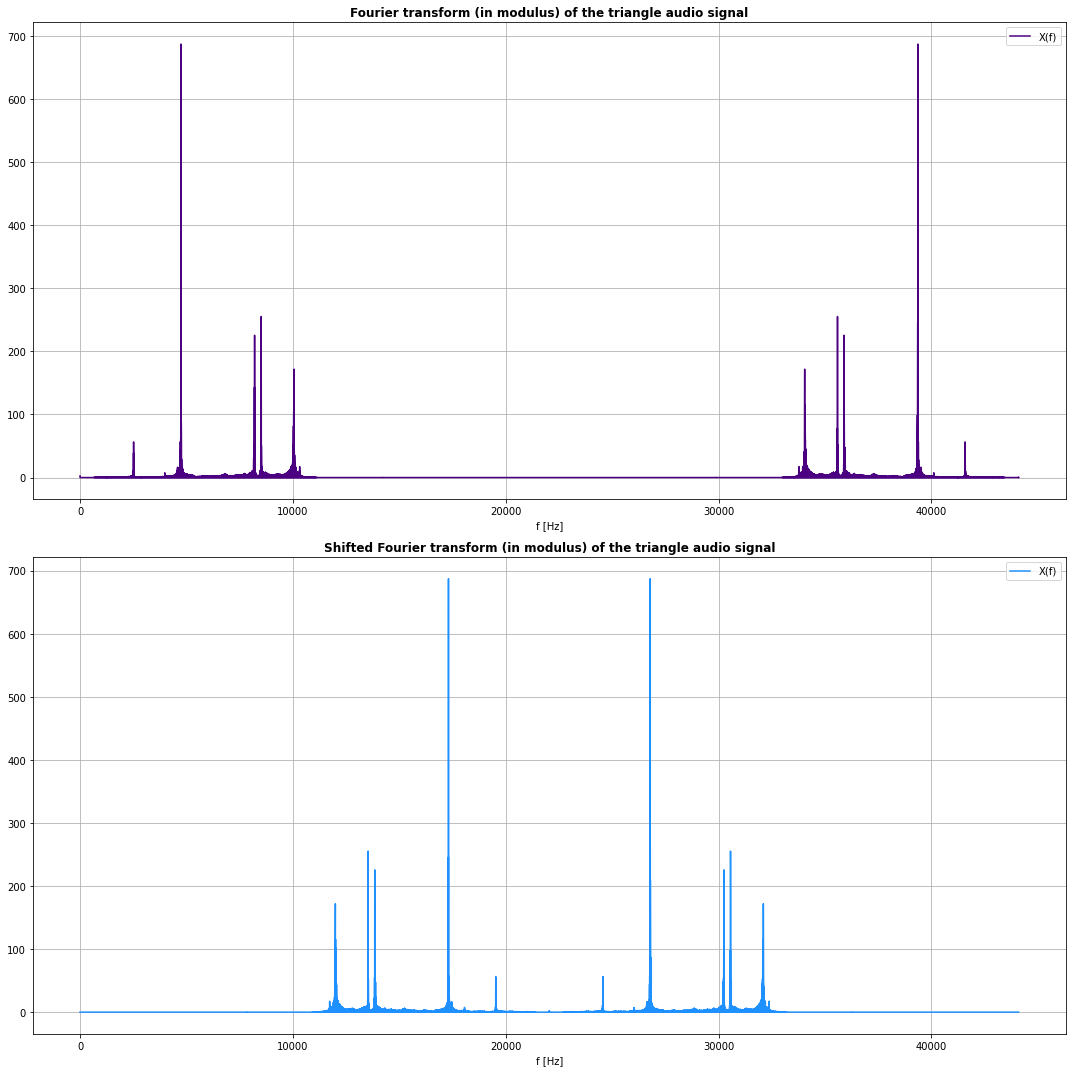

In [14]:
fig2, ax2 = plt.subplots(2, figsize=(15, 15))
ax2[0].set_title("Fourier transform (in modulus) of the triangle audio signal", fontweight="bold")
ax2[0].plot(f_triangle, np.abs(Fourier_triangle), color="indigo", label="X(f)")
ax2[0].set_xlabel("f [Hz]")
ax2[0].legend()
ax2[0].grid()

ax2[1].set_title("Shifted Fourier transform (in modulus) of the triangle audio signal", fontweight="bold")
ax2[1].plot(f_triangle, np.abs(Fourier_triangle_shifted), color="dodgerblue", label="X(f)")
ax2[1].set_xlabel("f [Hz]")
ax2[1].legend()
ax2[1].grid()
plt.tight_layout()

## **Overlapping the didgeridoo track and the triangle track into a single musical track**

Through the ```AudioSegment.from_file``` function I create two AudioSegment objects from the .wav files of the didgeridoo and the triangle, then **I overlap the tracks of the two instruments**, through the ```overlay``` function, to create a unique one and finally save the file with the name "joined_sound.wav" using the ```export``` function

In [15]:
wavfile_compound = "joined_sound.wav"    # enter the name or path of the .wav audio file to be created by superimposing the audio tracks of the didgeridoo and the triangle

sound1 = AudioSegment.from_file(wavfile_didgeridoo)
sound2 = AudioSegment.from_file(wavfile_triangle)

compound = sound1.overlay(sound2)

compound.export(wavfile_compound, format="wav")

<_io.BufferedRandom name='joined_sound.wav'>

## **Analysis of the only musical track obtained by superimposing the tracks of the previous instruments**

**I load the superimposed audio into memory** using the ```IPython.display.Audio``` function

In [16]:
wavfile_compound = wavfile_compound
IPython.display.Audio(wavfile_compound)

To **read the audio file** of the superimposed sound previously loaded I use the ```wav.read``` function which returns two values:


*   the **sampling rate** of the audio signal
*   the **audio signal**

In [17]:
fs_compound, sound_compound = wav.read(wavfile_compound)

I calculate **how many times the audio signal of the superimposed sound is sampled** using the ```len``` function, then I find the **sampling time** of the signal which will be the reciprocal of the sampling rate found previously ($T_s = \frac{1}{f_s}$) and I create the **time axis** using the calculated data (each sample will be at distance $T_s = \frac{1}{f_s}$)

In [18]:
N_compound = len(sound_compound)
Ts_compound = 1/fs_compound
t_compound = Ts_compound * np.arange(N_compound)

I create the **frequency axis** using the previously calculated data, then I calculate the **Fourier transform** using the ```np.fft.fft``` function and finally **I shift the peaks** obtained from the Fourier transform **in the center** using the function ```np.fft.fftshift```

In [19]:
f_compound = fs_compound/N_compound * np.arange(N_compound)
Fourier_compound = np.fft.fft(sound_compound)/N_compound   # division made to avoid that the peaks are too high
Fourier_compound_shifted = np.fft.fftshift(Fourier_compound)

**I visualize the audio signal** of the superimposed sound as the time changes

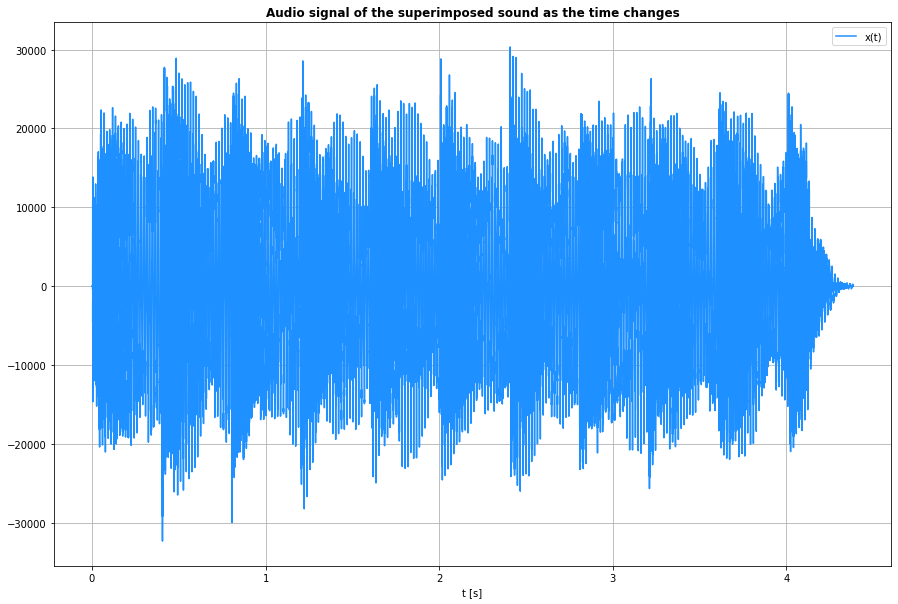

In [20]:
plt.figure(figsize=(15, 10))
plt.title("Audio signal of the superimposed sound as the time changes", fontweight="bold")
plt.plot(t_compound, sound_compound, "dodgerblue", label="x(t)")
plt.xlabel('t [s]')
plt.legend()
plt.grid()

**I visualize the Fourier transform** of the audio signal of the superimposed sound and then **the peaks** of the **shifted Fourier transform to the center** of the graph as the frequency changes.

We can see that the frequency graph of the superimposed sound turns out to be substantially zero with about
>>$11000 Hz < f < 34000 Hz$

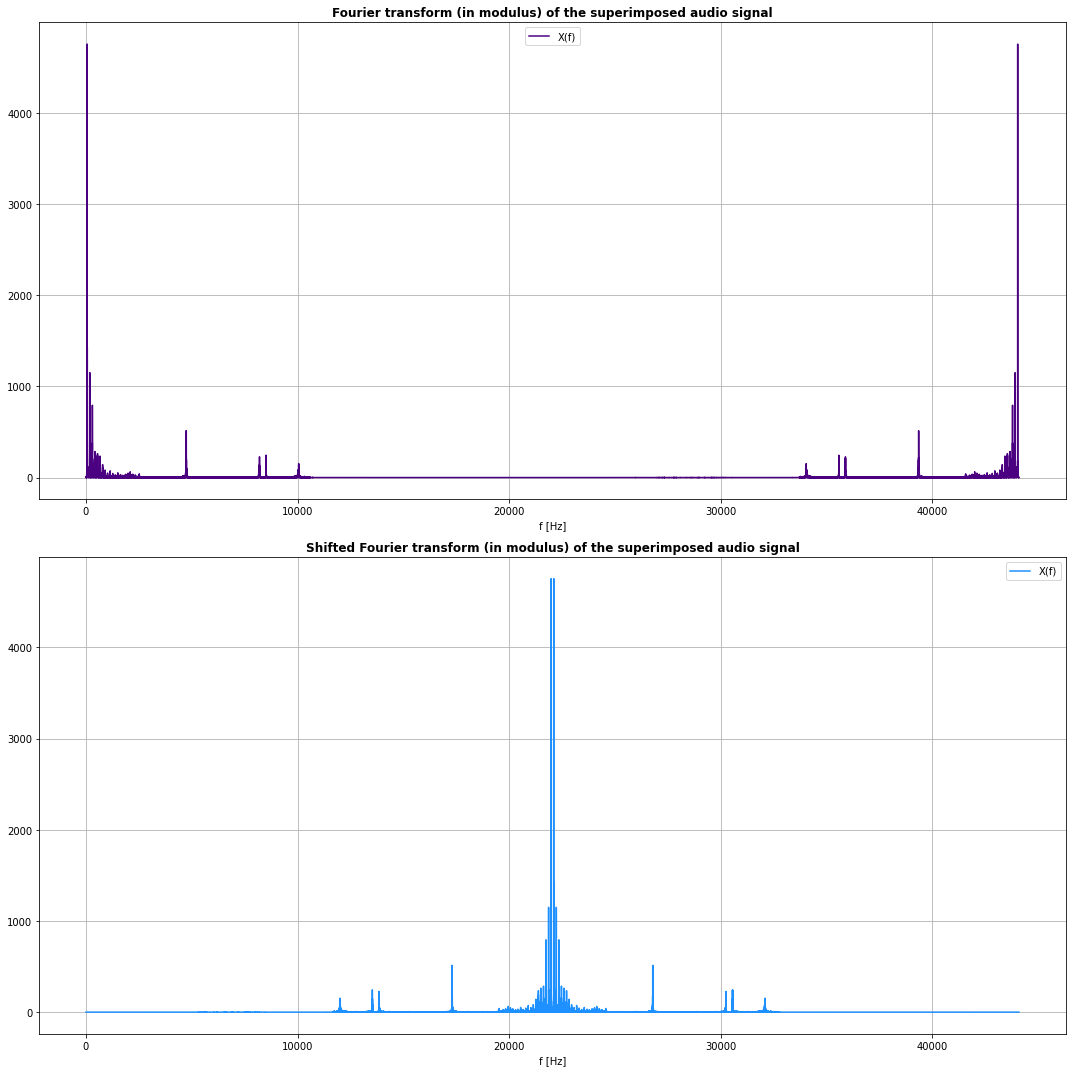

In [21]:
fig3, ax3 = plt.subplots(2, figsize=(15, 15))
ax3[0].set_title("Fourier transform (in modulus) of the superimposed audio signal", fontweight="bold")
ax3[0].plot(f_compound, np.abs(Fourier_compound), color="indigo", label="X(f)")
ax3[0].set_xlabel("f [Hz]")
ax3[0].legend()
ax3[0].grid()

ax3[1].set_title("Shifted Fourier transform (in modulus) of the superimposed audio signal", fontweight="bold")
ax3[1].plot(f_compound, np.abs(Fourier_compound_shifted), color="dodgerblue", label="X(f)")
ax3[1].set_xlabel("f [Hz]")
ax3[1].legend()
ax3[1].grid()
plt.tight_layout()

## **Filtering of superimposed sound**

### **I get the triangle sound from the superimposed sound**

Working on a copy of the Fourier transform of the superimposed track (created with the ```copy``` function), **I filter the overlaid sound in frequency** using the ```np.argwhere``` function and **resetting** all **frequencies** where
>>$f < 4500 Hz$

or

>>$f > 39500 Hz$

Respecting what we noticed in the graph of the Fourier transform obtained during the analysis of the audio signal of the triangle



In [22]:
Fourier_filtered1 = Fourier_compound.copy()

index1 = np.argwhere((f_compound<4500) | (f_compound>39500))
Fourier_filtered1[index1] = 0

**I visualize the Fourier transform** of the audio signal of the superimposed sound which is filtered as the frequency changes.

We can see that it is very **similar to the Fourier transform of the audio signal of the triangle**

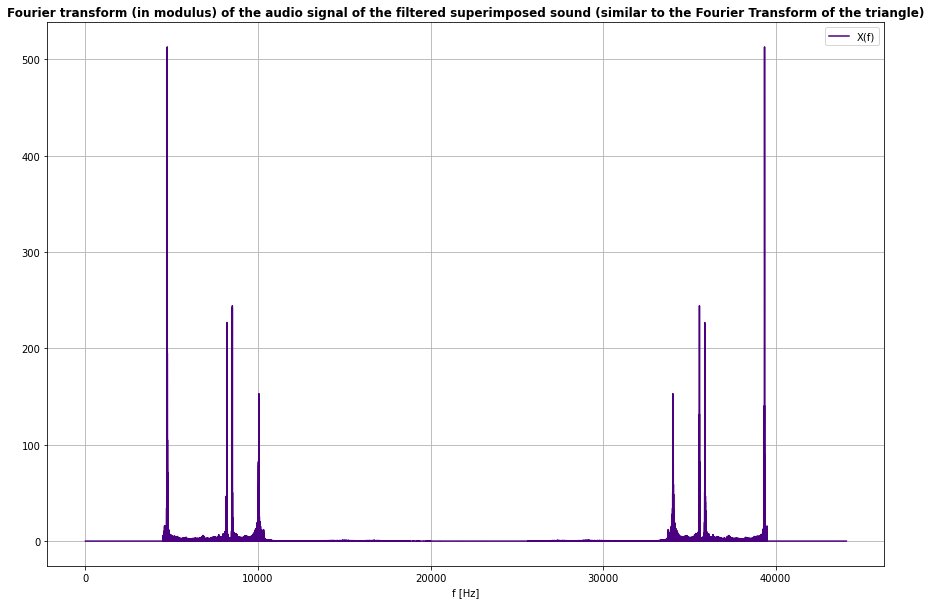

In [23]:
plt.figure(figsize=(15, 10))
plt.title("Fourier transform (in modulus) of the audio signal of the filtered superimposed sound (similar to the Fourier Transform of the triangle)", fontweight="bold")
plt.plot(f_compound, np.abs(Fourier_filtered1), "indigo", label="X(f)")
plt.xlabel("f [Hz]")
plt.legend()
plt.grid()

To hear what we have obtained, I use the **inverse Fourier transform** (function ```np.fft.ifft```). It will bring us back to the **time-dependent signals** and therefore listenable through the ```IPython.display.Audio``` function.

We can listen that the **sound is very similar to the original triangle sound**, but there is some "**noise**" that we cannot completely filter out, however it **completely** eliminates the **didgeridoo sound**

In [24]:
IPython.display.Audio(np.fft.ifft(Fourier_filtered1), rate=fs_compound)

### **I get the didgeridoo sound from the superimposed sound**

Working on a copy of the Fourier transform of the superimposed track (created with the ```copy``` function), **I filter the overlaid sound in frequency** using the ```np.argwhere``` function and **resetting** all **frequencies** where
>>$2000 Hz < f < 42000 Hz$

Respecting what we noticed in the graph of the Fourier transform obtained during the analysis of the audio signal of the didgeridoo

In [25]:
Fourier_filtered2 = Fourier_compound.copy()

index2 = np.argwhere((f_compound>2000) & (f_compound<42000))
Fourier_filtered2[index2] = 0

**I visualize the Fourier transform** of the audio signal of the superimposed sound which is filtered as the frequency changes.

We can see that it is very **similar to the Fourier transform of the audio signal of the didgeridoo**

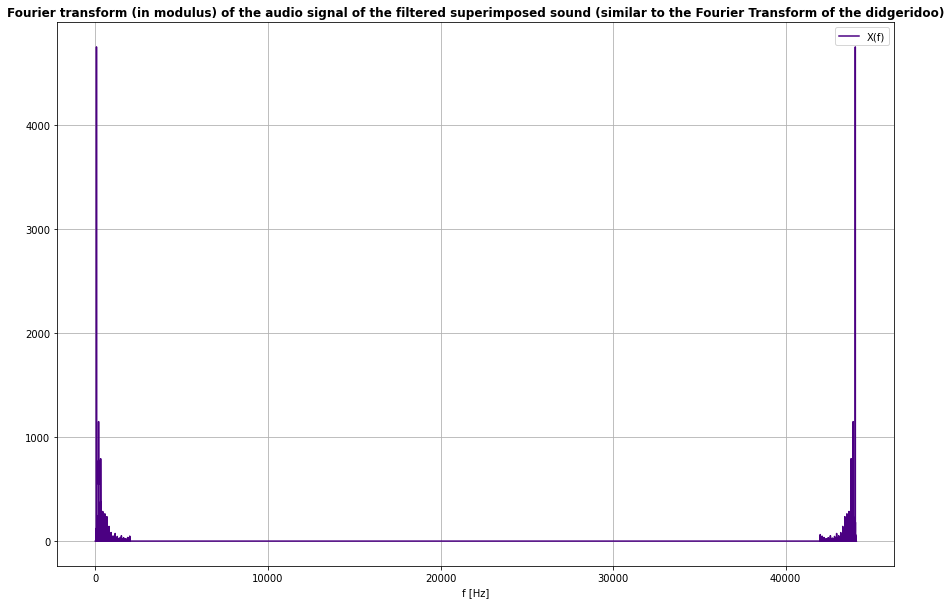

In [26]:
plt.figure(figsize=(15, 10))
plt.title("Fourier transform (in modulus) of the audio signal of the filtered superimposed sound (similar to the Fourier Transform of the didgeridoo)", fontweight="bold")
plt.plot(f_compound, np.abs(Fourier_filtered2), "indigo", label="X(f)")
plt.xlabel("f [Hz]")
plt.legend()
plt.grid()

To hear what we have obtained, I use the **inverse Fourier transform** (function ```np.fft.ifft```). It will bring us back to the **time-dependent signals** and therefore listenable through the ```IPython.display.Audio``` function.

We can listen that the **sound is very similar to the original didgeridoo sound**, it sounds slightly "**muffled**", but it completely **eliminates** the **triangle sound**

In [27]:
IPython.display.Audio(np.fft.ifft(Fourier_filtered2), rate=fs_compound)

## **Conclusion**
From the results obtained we can conclude that it is possible to filter musical tracks in frequency and isolate the instruments, as long as the **frequencies of the instruments are well distinct** (for example one instrument that works at high frequencies and one that works at low frequencies ).

Filtering of frequency sounds has two **negative aspects**:


*   **It is not possible to completely eliminate the noise** that remains in the background in the filtered sounds, because using band-pass filters you only allow the passage of frequencies within a given range, canceling the frequencies not present in this range. Within the range of frequencies to which the passage is allowed there is some noise that cannot be eliminated, as otherwise some useful frequencies could also be eliminated that should not be filtered. By applying a band-pass filter like the one I applied, all the noise present in the frequencies that you do not want to pass within the frequency domain are canceled, but when the two signals overlap some (few) frequencies overlap and when filtering it is not possible to completely eliminate the frequencies of the sound that we are not interested in listening to (if not losing some small information about the sound we are interested in). For example, I eliminate a small peak from the triangle in order to reduce the noise given by the overlapping of some frequencies of the two sounds. All of this leads to a slight noise in the triangle sound and a slightly muffled sound in the didgeridoo sound that we get from the joined musical track.
*   **Tracks of ad hoc musical instruments must be chosen**, because if this is not respected when the sounds are superimposed (forming a single musical track), the frequencies will also be superimposed, so they cannot be filtered by separating into quite clearly the sounds (by zeroing the frequency of all sounds except the one you are interested in listening to).